In [ ]:
import pandas as pd
import requests
import os

In [2]:
data_file_path = 'data_export.csv'

In [3]:
image_download_path = 'images'
if not os.path.exists(image_download_path):
    os.makedirs(image_download_path)

In [4]:
df = pd.read_csv(data_file_path)

In [5]:
print("original data shape:", df.shape)

original data shape: (2645, 31)


In [6]:
df.isnull().sum()


title                      0
date                       0
specimenId               101
species                    0
sex                        0
abdomenStatus              1
morphSpecies            1235
morphSex                2501
morphAbdomenStatus      1743
morphNotes              2593
country                    0
district                   0
site                       1
image                     47
yolovConfidenceLevel      38
imageZoomed               38
status                    38
latitude                2336
longitude               2336
cityName                2390
deviceInUse             2562
phoneInUse              2562
deviceId                   0
localId                    0
collectionMethod           0
createdAt                  0
hardware                  58
isCompleted                0
name                       0
notes                   2083
updatedAt                  0
dtype: int64

In [7]:
df['morphSpecies'] = df['morphSpecies'].fillna('')

In [8]:
df['species'] = df['species'].str.strip()

In [9]:
df.loc[df['morphSpecies'] == '', 'morphSpecies'] = df['species']

In [10]:
df.head(5)

,title,date,specimenId,species,sex,abdomenStatus,morphSpecies,morphSex,morphAbdomenStatus,morphNotes,...,phoneInUse,deviceId,localId,collectionMethod,createdAt,hardware,isCompleted,name,notes,updatedAt
0,Testing black screen,9/1/23,1,Anopheles other,Female,FF - Fully Fed,Anopheles other,NaN,NaN,NaN,...,NaN,f5592ae3dbe9b574:0e775029-5e30-488b-9dee-c52c0...,1:11,Pyrethroid Spray Catch (PSC),2023-01-09T16:58:15.450Z,VectorCam V1,False,UserPhil,NaN,2023-01-09T16:58:15.450Z
1,hshs,9/1/23,1,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:01,Human Landing Catch (HLC),2023-01-10T05:46:45.386Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:45.386Z
2,TestCase,11/1/23,1,Anopheles funestus,Female,FF - Fully Fed,Anopheles funestus,NaN,NaN,NaN,...,NaN,59fc2e35fc8ca340:80262e5c-2297-4467-8435-daa2a...,1:01,Human Landing Catch (HLC),2023-01-16T10:03:48.132Z,VectorCam V3,False,Demo Device,NaN,2023-01-16T10:03:48.132Z
3,Testing black screen,9/1/23,2,Other,Female,FF - Fully Fed,Other,NaN,NaN,NaN,...,NaN,f5592ae3dbe9b574:0e775029-5e30-488b-9dee-c52c0...,1:12,Pyrethroid Spray Catch (PSC),2023-01-09T16:58:17.894Z,VectorCam V1,False,UserPhil,NaN,2023-01-09T16:58:17.894Z
4,hshs,9/1/23,2,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:02,Human Landing Catch (HLC),2023-01-10T05:46:44.837Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:44.837Z


In [11]:
df = df[~df['title'].str.contains('test', case=False, na=False)]
print("Shape after filtering 'test' in title:", df.shape)

Shape after filtering 'test' in title: (2433, 31)


In [12]:
df.head()

,title,date,specimenId,species,sex,abdomenStatus,morphSpecies,morphSex,morphAbdomenStatus,morphNotes,...,phoneInUse,deviceId,localId,collectionMethod,createdAt,hardware,isCompleted,name,notes,updatedAt
1,hshs,9/1/23,1,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:01,Human Landing Catch (HLC),2023-01-10T05:46:45.386Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:45.386Z
4,hshs,9/1/23,2,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:02,Human Landing Catch (HLC),2023-01-10T05:46:44.837Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:44.837Z
7,hshs,9/1/23,3,Anopheles other,Female,UF - Unfed,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:03,Human Landing Catch (HLC),2023-01-10T05:46:47.003Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:47.003Z
10,hshs,9/1/23,4,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:04,Human Landing Catch (HLC),2023-01-10T05:46:47.866Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:47.866Z
13,Phil,10/1/23,6,Culex,Female,G - Gravid,Culex,NaN,NaN,NaN,...,NaN,f5592ae3dbe9b574:62d9cf7a-6770-4514-8d9c-f89bf...,1:05,Pyrethroid Spray Catch (PSC),2023-01-10T13:44:54.019Z,VectorCam V1,False,UserPhil,NaN,2023-01-10T13:44:54.019Z


In [13]:
df = df[~df['country'].str.contains('USA', case=False, na=False)]
print("Shape after filtering 'USA' in country:", df.shape)

Shape after filtering 'USA' in country: (2357, 31)


In [14]:
df= df[~df['country'].str.contains('india', case=False, na=False)]
# removed India as the images were not exactly of moquitoes 

In [15]:
df.shape

(2353, 31)

In [16]:
df['morphSpecies'].unique()

array(['Anopheles funestus', 'Anopheles gambiae', 'Anopheles other',
       'Culex', 'Mansonia', 'mansonia', 'MANSONIA', 'Other',
       'Anopheles Stephensi', 'Mansonia '], dtype=object)

In [17]:
def download_image(url, file_name):
    # send a get request to the URL
    response = requests.get(url)
    # open a file for writing
    with open(file_name, 'wb') as f:
        # write the contents of the response to the file
        f.write(response.content)
 
for idx, row in df.iterrows():
    # get name and image column values from each row
    try:
        name = row['specimenId']
        url = row['image']
        full_path = os.path.join(image_download_path, name + ".jpg")
        download_image(url, full_path)
        print(name, url)
    except:
        print('Error')  # Ignore it

DG025_01 http://137.184.182.201:5005/images/session/image-2023-01-06-12-41-55.456-459d004632e3d0c1-2-52.jpg
DL001 http://137.184.182.201:5005/images/session/image-2023-01-07-15-20-03.619-8864d3d1904d7781-1-1.jpg
DL001 http://137.184.182.201:5005/images/session/image-2023-01-07-15-20-04.099-00ebdee4b2f086e2-3-10.jpg
DL001 http://137.184.182.201:5005/images/session/image-2023-01-07-15-30-58.943-33dd2ef449f3b50c-7-270.jpg
DL001 http://137.184.182.201:5005/images/session/image-2023-01-08-16-24-31.957-f67276ffbafcaa8b-3-61.jpg
DL001_01 http://137.184.182.201:5005/images/session/image-2023-01-07-15-20-03.587-8864d3d1904d7781-1-2.jpg
DL001_01 http://137.184.182.201:5005/images/session/image-2023-01-07-15-20-04.252-00ebdee4b2f086e2-3-11.jpg
DL001_01 http://137.184.182.201:5005/images/session/image-2023-01-08-16-24-31.988-f67276ffbafcaa8b-3-62.jpg
DL001_02 http://137.184.182.201:5005/images/session/image-2023-01-07-15-20-04.069-8864d3d1904d7781-1-3.jpg
DL001_02 http://137.184.182.201:5005/image

In [19]:
df.loc[df['morphSpecies'].str.strip().str.lower() == 'mansonia', 'morphSpecies'] = 'Mansonia'

In [20]:
df['morphSpecies'].unique()

array(['Anopheles funestus', 'Anopheles gambiae', 'Anopheles other',
       'Culex', 'Mansonia', 'Other', 'Anopheles Stephensi'], dtype=object)

In [77]:
df['morphSpecies'].value_counts()

morphSpecies
Anopheles funestus     1355
Mansonia                367
Culex                   278
Other                   226
Anopheles gambiae        72
Anopheles other          54
Anopheles Stephensi       1
Name: count, dtype: int64

In [21]:
df.isnull().sum()

title                      0
date                       0
specimenId                 5
species                    0
sex                        0
abdomenStatus              1
morphSpecies               0
morphSex                2215
morphAbdomenStatus      1466
morphNotes              2301
country                    0
district                   0
site                       0
image                     45
yolovConfidenceLevel      38
imageZoomed               38
status                    38
latitude                2099
longitude               2099
cityName                2152
deviceInUse             2322
phoneInUse              2322
deviceId                   0
localId                    0
collectionMethod           0
createdAt                  0
hardware                   2
isCompleted                0
name                       0
notes                   1791
updatedAt                  0
dtype: int64

In [22]:
df.columns

Index(['title', 'date', 'specimenId', 'species', 'sex', 'abdomenStatus',
       'morphSpecies', 'morphSex', 'morphAbdomenStatus', 'morphNotes',
       'country', 'district', 'site', 'image', 'yolovConfidenceLevel',
       'imageZoomed', 'status', 'latitude', 'longitude', 'cityName',
       'deviceInUse', 'phoneInUse', 'deviceId', 'localId', 'collectionMethod',
       'createdAt', 'hardware', 'isCompleted', 'name', 'notes', 'updatedAt'],
      dtype='object')

In [23]:
final = df[['specimenId','morphSpecies']]

In [24]:
final.head()

,specimenId,morphSpecies
92,DG025_01,Anopheles funestus
93,DL001,Anopheles funestus
94,DL001,Anopheles gambiae
95,DL001,Anopheles funestus
96,DL001,Anopheles funestus


In [26]:
final.shape

(2353, 2)

In [ ]:
final = final[final['morphSpecies'] != 'Anopheles Stephensi'] # found only one image for this species will cause error later while splitting


In [ ]:
import os
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import AutoImageProcessor, AutoModelForImageClassification 
from torch.utils.data import WeightedRandomSampler


IMAGE_DIR = 'images'  
HF_MODEL_NAME = 'microsoft/swin-base-patch4-window7-224'
NUM_CLASSES = 6  # Number of mosquito classes
BATCH_SIZE = 8   
LEARNING_RATE = 1e-5 
WEIGHT_DECAY = 0.01 
NUM_EPOCHS = 10    
RANDOM_SEED = 42 

   specimenId        morphSpecies
92   DG025_01  Anopheles funestus
93      DL001  Anopheles funestus
94      DL001   Anopheles gambiae
95      DL001  Anopheles funestus
96      DL001  Anopheles funestus


In [138]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA device found. Using {torch.cuda.get_device_name(0)}.")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS device found. Using MPS.")
else:
    device = torch.device("cpu")
    print("No GPU or MPS found. Using CPU.")

MPS device found. Using MPS.


In [ ]:
final_df_loaded = final.copy()
print("\n--- Data Preparation: Label Encoding and Image Paths ---")

final_df_loaded['specimenId'] = final_df_loaded['specimenId'].astype(str)

label_encoder = LabelEncoder()
final_df_loaded['label_encoded'] = label_encoder.fit_transform(final_df_loaded['morphSpecies'])

idx_to_class = {i: cls_name for i, cls_name in enumerate(label_encoder.classes_)}
class_to_idx = {cls_name: i for i, cls_name in enumerate(label_encoder.classes_)}
print("Label mapping created:")
for i, class_name in idx_to_class.items():
    print(f"  {i}: {class_name}")

final_df_loaded['image_path'] = final_df_loaded['specimenId'].apply(lambda x: os.path.join(IMAGE_DIR, x + '.jpg'))

initial_count = len(final_df_loaded)
final_df = final_df_loaded[final_df_loaded['image_path'].apply(os.path.exists)].copy()

if len(final_df) < initial_count:
    print(f"Filtered out {initial_count - len(final_df)} samples due to missing image files.")
print(f"Number of samples after potentially filtering for existing images: {len(final_df)}")
if len(final_df) == 0:
    raise ValueError("No valid image paths found. Please check IMAGE_DIR and image filenames.")



--- Data Preparation: Label Encoding and Image Paths ---
Label mapping created:
  0: Anopheles funestus
  1: Anopheles gambiae
  2: Anopheles other
  3: Culex
  4: Mansonia
  5: Other
Filtered out 35 samples due to missing image files.
Number of samples after potentially filtering for existing images: 2317
------------------------------


In [ ]:
print("\n--- Data Splitting (Train/Validation/Test) ---")

# Overall proportions: 70% train, 10% validation, 20% test

train_val_df, test_df = train_test_split(
    final_df,
    test_size=0.20,
    random_state=RANDOM_SEED,
    stratify=final_df['label_encoded'] 
)

val_split_ratio = 0.125 

train_df, val_df = train_test_split(
    train_val_df,
    test_size=val_split_ratio, 
    random_state=RANDOM_SEED,
    stratify=train_val_df['label_encoded'] 
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(f"Total samples: {len(final_df)}")
print(f"Training samples: {len(train_df)} ({len(train_df)/len(final_df)*100:.1f}%)")
print(f"Validation samples: {len(val_df)} ({len(val_df)/len(final_df)*100:.1f}%)")
print(f"Test samples: {len(test_df)} ({len(test_df)/len(final_df)*100:.1f}%)")



--- Data Splitting (Train/Validation/Test) ---
Total samples: 2317
Training samples: 1621 (70.0%)
Validation samples: 232 (10.0%)
Test samples: 464 (20.0%)
------------------------------


In [ ]:
print("\n--- PyTorch Dataset Class Definition (with Targeted Augmentation) ---")

image_processor = AutoImageProcessor.from_pretrained(HF_MODEL_NAME)
IMAGE_SIZE = image_processor.size['shortest_edge'] if 'shortest_edge' in image_processor.size else image_processor.size['height']

standard_train_custom_transforms = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
])

TARGET_AGGRESSIVE_AUG_CLASSES = ['Anopheles gambiae', 'Anopheles other']

aggressive_train_custom_transforms = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.6, 1.0)), 
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(p=0.5), 
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2), 
    transforms.RandomRotation(30), 
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10), 
    transforms.GaussianBlur(kernel_size=(3, 7), sigma=(0.1, 2.0)), 
])

val_test_custom_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE + 32), 
    transforms.CenterCrop(IMAGE_SIZE),
])

class MosquitoImageDataset(Dataset):
    def __init__(self, dataframe, image_processor, 
                 standard_transforms=None, aggressive_transforms=None, 
                 aggressive_target_classes=None):
        self.dataframe = dataframe 
        self.image_processor = image_processor
        self.standard_transforms = standard_transforms
        self.aggressive_transforms = aggressive_transforms
        self.aggressive_target_classes = aggressive_target_classes if aggressive_target_classes else []

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['image_path']
        label = row['label_encoded'] 
        species_name = row['morphSpecies'] 

        try:
            image = Image.open(img_path).convert('RGB')
        except FileNotFoundError:
            print(f"ERROR: Image not found at {img_path}. Check IMAGE_DIR and filenames.")
            dummy_image_tensor = torch.zeros((3, IMAGE_SIZE, IMAGE_SIZE))
            return {'pixel_values': dummy_image_tensor, 'labels': torch.tensor(-1, dtype=torch.long)}

        current_transforms = None
        if species_name in self.aggressive_target_classes and self.aggressive_transforms:
            current_transforms = self.aggressive_transforms
        elif self.standard_transforms:
            current_transforms = self.standard_transforms

        if current_transforms:
            image = current_transforms(image)

        processed_inputs = self.image_processor(images=image, return_tensors="pt")
        pixel_values = processed_inputs['pixel_values'].squeeze(0)

        return {'pixel_values': pixel_values, 'labels': torch.tensor(label, dtype=torch.long)}

train_dataset = MosquitoImageDataset(
    train_df,
    image_processor,
    standard_transforms=standard_train_custom_transforms,
    aggressive_transforms=aggressive_train_custom_transforms,
    aggressive_target_classes=TARGET_AGGRESSIVE_AUG_CLASSES
)

val_dataset = MosquitoImageDataset(
    val_df,
    image_processor,
    standard_transforms=val_test_custom_transforms 
    
)

test_dataset = MosquitoImageDataset(
    test_df,
    image_processor,
    standard_transforms=val_test_custom_transforms 
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Aggressive augmentation will be applied to: {TARGET_AGGRESSIVE_AUG_CLASSES}")

train_class_counts = train_df['label_encoded'].value_counts().sort_index()
class_weights_sampler = torch.tensor([1.0 / train_class_counts.get(i, float('inf')) for i in range(NUM_CLASSES)], dtype=torch.float)
sample_weights = torch.tensor([class_weights_sampler[label] for label in train_df['label_encoded']], dtype=torch.float)


--- PyTorch Dataset Class Definition (with Targeted Augmentation) ---
Train dataset size: 1621
Validation dataset size: 232
Test dataset size: 464
Aggressive augmentation will be applied to: ['Anopheles gambiae', 'Anopheles other']


In [ ]:
print("\n--- DataLoaders ---")
def collate_fn(batch):
    batch = [item for item in batch if item['labels'].item() != -1]
    if not batch: 
        return None

    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.tensor([item['labels'] for item in batch], dtype=torch.long)
    return {'pixel_values': pixel_values, 'labels': labels}
use_pin_memory = True if device.type == 'cuda' else False

train_sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,sampler=train_sampler, collate_fn=collate_fn, num_workers=0, pin_memory=use_pin_memory)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=0, pin_memory=use_pin_memory)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=0, pin_memory=use_pin_memory)

print(f"Train DataLoader: {len(train_loader)} batches of size {BATCH_SIZE}")
print(f"Validation DataLoader: {len(val_loader)} batches of size {BATCH_SIZE}")
print(f"Test DataLoader: {len(test_loader)} batches of size {BATCH_SIZE}")



--- DataLoaders ---
Train DataLoader: 203 batches of size 8
Validation DataLoader: 29 batches of size 8
Test DataLoader: 58 batches of size 8
------------------------------


In [ ]:
print("\n--- Model Setup ---")
model = AutoModelForImageClassification.from_pretrained(
    HF_MODEL_NAME,
    num_labels=NUM_CLASSES,
    ignore_mismatched_sizes=True  
).to(device) 

print(f"Model '{HF_MODEL_NAME}' loaded with {NUM_CLASSES} output classes and moved to {device}.")



--- Model Setup ---


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([6, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model 'microsoft/swin-base-patch4-window7-224' loaded with 6 output classes and moved to mps.
------------------------------


In [ ]:
print("\n--- Optimizer and Loss Function ---")
total_train_samples = len(train_df)
class_weights_values = total_train_samples / (NUM_CLASSES * train_class_counts)
class_weights_tensor = torch.tensor(class_weights_values.values, dtype=torch.float).to(device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor) # Use class weights to handle class imbalance

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1) # Example: reduce LR every 3 epochs
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1)

print(f"Optimizer: AdamW with LR={LEARNING_RATE}, Weight Decay={WEIGHT_DECAY}")
print(f"Loss Function: CrossEntropyLoss")



--- Optimizer and Loss Function ---
Optimizer: AdamW with LR=1e-05, Weight Decay=0.01
Loss Function: CrossEntropyLoss
------------------------------


In [ ]:
print("\n--- Training and Validation Loop ---")

train_losses = []
val_losses = []
val_accuracies = []

best_val_accuracy = 0.0
best_model_path = f'{HF_MODEL_NAME.replace("/", "_")}_mosquito_classifier_best_model.pth' 

for epoch in range(NUM_EPOCHS):
   
    model.train()  
    running_loss = 0.0
    processed_batches_train = 0

    for i, batch in enumerate(train_loader):
        if batch is None: 
            print(f"Skipping training batch {i+1} due to all samples being invalid.")
            continue

        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        processed_batches_train += 1

        if (i + 1) % 10 == 0 or (i + 1) == len(train_loader): 
            if processed_batches_train > 0:
                 print(f"  Epoch [{epoch+1}/{NUM_EPOCHS}], Batch [{i+1}/{len(train_loader)}], Current Avg Batch Loss: {loss.item():.4f}")

    if processed_batches_train > 0:
        avg_epoch_train_loss = running_loss / processed_batches_train
        train_losses.append(avg_epoch_train_loss)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Average Training Loss: {avg_epoch_train_loss:.4f}")
    else:
        train_losses.append(float('inf')) 
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - No batches processed in training. Check data or batch filtering.")

    # --- Validation Phase ---
    model.eval() 
    val_running_loss = 0.0
    all_preds_val = []
    all_labels_val = []
    processed_batches_val = 0

    with torch.no_grad(): 
        for batch in val_loader:
            if batch is None:
                print(f"Skipping validation batch due to all samples being invalid.")
                continue

            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(pixel_values).logits
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            processed_batches_val +=1

            _, predicted = torch.max(outputs, 1)
            all_preds_val.extend(predicted.cpu().numpy())
            all_labels_val.extend(labels.cpu().numpy())

    if processed_batches_val > 0 and len(all_labels_val) > 0:
        avg_epoch_val_loss = val_running_loss / processed_batches_val
        val_accuracy = accuracy_score(all_labels_val, all_preds_val)
        val_losses.append(avg_epoch_val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Validation Loss: {avg_epoch_val_loss:.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), best_model_path)
            print(f"  New best model saved to {best_model_path} with accuracy: {best_val_accuracy*100:.2f}%")

        if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
           scheduler.step(avg_epoch_val_loss)
        elif scheduler is not None:
           scheduler.step()

    else:
        val_losses.append(float('inf'))
        val_accuracies.append(0.0)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - No batches processed in validation or no labels collected.")
    

print("Training and validation complete.")


--- Training and Validation Loop ---
  Epoch [1/10], Batch [10/203], Current Avg Batch Loss: 1.5188
  Epoch [1/10], Batch [20/203], Current Avg Batch Loss: 1.5131
  Epoch [1/10], Batch [30/203], Current Avg Batch Loss: 0.7849
  Epoch [1/10], Batch [40/203], Current Avg Batch Loss: 0.9860
  Epoch [1/10], Batch [50/203], Current Avg Batch Loss: 1.0379
  Epoch [1/10], Batch [60/203], Current Avg Batch Loss: 1.0393
  Epoch [1/10], Batch [70/203], Current Avg Batch Loss: 0.6354
  Epoch [1/10], Batch [80/203], Current Avg Batch Loss: 0.7915
  Epoch [1/10], Batch [90/203], Current Avg Batch Loss: 1.1931
  Epoch [1/10], Batch [100/203], Current Avg Batch Loss: 0.8096
  Epoch [1/10], Batch [110/203], Current Avg Batch Loss: 0.8603
  Epoch [1/10], Batch [120/203], Current Avg Batch Loss: 0.3975
  Epoch [1/10], Batch [130/203], Current Avg Batch Loss: 0.2418
  Epoch [1/10], Batch [140/203], Current Avg Batch Loss: 0.6165
  Epoch [1/10], Batch [150/203], Current Avg Batch Loss: 0.5183
  Epoch [1/

In [ ]:
print("\n--- Final Evaluation on Test Set ---")


model.eval() 
all_preds_test = []
all_labels_test = []
test_running_loss = 0.0
processed_batches_test = 0

with torch.no_grad():
    for batch in test_loader:
        if batch is None:
            print(f"Skipping test batch due to all samples being invalid.")
            continue

        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(pixel_values).logits
        loss = criterion(outputs, labels) 
        test_running_loss += loss.item()
        processed_batches_test += 1

        _, predicted = torch.max(outputs, 1)
        all_preds_test.extend(predicted.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

if processed_batches_test > 0 and len(all_labels_test) > 0:
    avg_test_loss = test_running_loss / processed_batches_test
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)
    print(f"Test Set Evaluation Results:")
    print(f"  Average Test Loss: {avg_test_loss:.4f}")
    print(f"  Test Accuracy: {test_accuracy*100:.2f}%")

    print("\nTest Set Classification Report:")
    try:
        target_names = [idx_to_class[i] for i in range(NUM_CLASSES)]
        print(classification_report(all_labels_test, all_preds_test, target_names=target_names, zero_division=0))
    except Exception as e:
        print(f"Could not generate test classification report: {e}")
        print("Unique labels in test_labels:", set(all_labels_test))
        print("Unique labels in test_preds:", set(all_preds_test))

    print("\nTest Set Confusion Matrix:")
    try:
        conf_matrix = confusion_matrix(all_labels_test, all_preds_test, labels=list(range(NUM_CLASSES)))
        conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)
        print(conf_matrix_df)
    except Exception as e:
        print(f"Could not generate test confusion matrix: {e}")
else:
    print("No batches processed in test evaluation or no labels collected. Check test_loader and data.")



--- Final Evaluation on Test Set ---
Test Set Evaluation Results:
  Average Test Loss: 1.1109
  Test Accuracy: 81.25%

Test Set Classification Report:
                    precision    recall  f1-score   support

Anopheles funestus       0.92      0.87      0.89       267
 Anopheles gambiae       0.67      0.14      0.24        14
   Anopheles other       0.67      0.20      0.31        10
             Culex       0.86      0.98      0.92        55
          Mansonia       0.86      0.66      0.74        73
             Other       0.45      0.89      0.60        45

          accuracy                           0.81       464
         macro avg       0.74      0.62      0.62       464
      weighted avg       0.85      0.81      0.81       464


Test Set Confusion Matrix:
                    Anopheles funestus  Anopheles gambiae  Anopheles other  \
Anopheles funestus                 231                  1                0   
Anopheles gambiae                   11                  2    

In [120]:

model_save_path_final_epoch = f'{HF_MODEL_NAME.replace("/", "_")}_mosquito_classifier_final_epoch.pth'
torch.save(model.state_dict(), model_save_path_final_epoch)
print(f"\nModel state_dict (from last epoch) saved to {model_save_path_final_epoch}")

# To save in Hugging Face format (model, config, processor):
# output_dir = "./dinov2_mosquito_classifier_hf_format"
# model.save_pretrained(output_dir)
# image_processor.save_pretrained(output_dir) # Save the processor too
# print(f"Full model and processor saved in Hugging Face format to {output_dir}")


Model state_dict (from last epoch) saved to microsoft_swin-base-patch4-window7-224_mosquito_classifier_final_epoch.pth


In [ ]:
print("\n--- Final Evaluation on Test Set ---")

if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    print(f"Loaded best model from {best_model_path} for final evaluation.")
else:
    print("Best model path not found. Evaluating with the model from the last epoch.")

model.eval()  
all_preds_test = []
all_labels_test = []
test_running_loss = 0.0
processed_batches_test = 0

with torch.no_grad():
    for batch in test_loader:
        if batch is None:
            print(f"Skipping test batch due to all samples being invalid.")
            continue

        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(pixel_values).logits
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()
        processed_batches_test += 1

        _, predicted = torch.max(outputs, 1)
        all_preds_test.extend(predicted.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

if processed_batches_test > 0 and len(all_labels_test) > 0:
    avg_test_loss = test_running_loss / processed_batches_test
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)
    print(f"Test Set Evaluation Results:")
    print(f"  Average Test Loss: {avg_test_loss:.4f}")
    print(f"  Test Accuracy: {test_accuracy*100:.2f}%")

    print("\nTest Set Classification Report:")
    try:
        target_names = [idx_to_class[i] for i in range(NUM_CLASSES)]
        print(classification_report(all_labels_test, all_preds_test, target_names=target_names, zero_division=0))
    except Exception as e:
        print(f"Could not generate test classification report: {e}")
        print("Unique labels in test_labels:", set(all_labels_test))
        print("Unique labels in test_preds:", set(all_preds_test))

    print("\nTest Set Confusion Matrix:")
    try:
        conf_matrix = confusion_matrix(all_labels_test, all_preds_test, labels=list(range(NUM_CLASSES)))
        conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)
        print(conf_matrix_df)
    except Exception as e:
        print(f"Could not generate test confusion matrix: {e}")
else:
    print("No batches processed in test evaluation or no labels collected. Check test_loader and data.")



--- Final Evaluation on Test Set ---
Loaded best model from microsoft_swin-base-patch4-window7-224_mosquito_classifier_best_model.pth for final evaluation.
Test Set Evaluation Results:
  Average Test Loss: 1.0943
  Test Accuracy: 82.33%

Test Set Classification Report:
                    precision    recall  f1-score   support

Anopheles funestus       0.92      0.88      0.90       267
 Anopheles gambiae       0.67      0.14      0.24        14
   Anopheles other       1.00      0.10      0.18        10
             Culex       0.89      0.98      0.93        55
          Mansonia       0.80      0.71      0.75        73
             Other       0.49      0.84      0.62        45

          accuracy                           0.82       464
         macro avg       0.79      0.61      0.60       464
      weighted avg       0.85      0.82      0.82       464


Test Set Confusion Matrix:
                    Anopheles funestus  Anopheles gambiae  Anopheles other  \
Anopheles funestus  

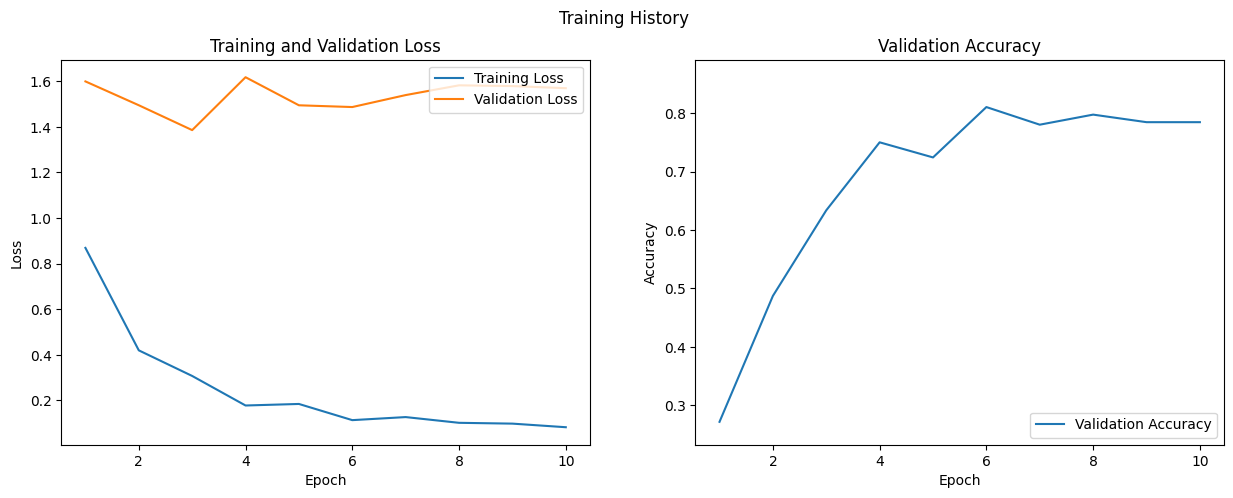

In [ ]:

import matplotlib.pyplot as plt

if train_losses and val_losses and val_accuracies:
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim())*0.95, max(min(max(val_accuracies)*1.1, 1.0), 0.1)]) 

    plt.suptitle('Training History')
    plt.show()
else:
    print("Not enough data to plot training history (losses/accuracies lists are empty or incomplete).")